In [2]:
# Import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [3]:
#Import csv file
north_indian_path = "North_Indian/ibtracs.NI.list.v04r00.csv"
#create new dataframe from row data
ni_data_df = pd.read_csv(north_indian_path)
ni_data_df


/var/folders/g0/gp6xbfyx5fx166bc5fdt4j580000gn/T/ipykernel_33669/4018402160.py:4: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  ni_data_df = pd.read_csv(north_indian_path)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,2023131N11088,2023,16,NI,BB,MOCHA,2023-05-14 06:00:00,NR,19.8,92.5,...,,,,,,,,,11,29
60484,2023131N11088,2023,16,NI,BB,MOCHA,2023-05-14 09:00:00,NR,20.2169,92.7348,...,,,,,,,,,12,29
60485,2023131N11088,2023,16,NI,BB,MOCHA,2023-05-14 12:00:00,NR,20.8,93.1,...,,,,,,,,,19,32
60486,2023131N11088,2023,16,NI,BB,MOCHA,2023-05-14 15:00:00,NR,21.7791,93.7926,...,,,,,,,,,27,34


In [4]:
# turn ISO time into datetime datatype
ni_data_df['ISO_TIME'] = pd.to_datetime(ni_data_df['ISO_TIME'],
                                                                format='%Y-%m-%d %H:%M:%S', errors='coerce')
# create a dataset from 1922 to 2022 from 'ISO_TIME'
ni_data_df = ni_data_df[(ni_data_df['ISO_TIME'].dt.year >= 1922) &
                                                              (ni_data_df['ISO_TIME'].dt.year <= 2022)]
# count # of 'NaT' values in ['ISO Time']
ni_count = ni_data_df['ISO_TIME'].isna().sum()
print("Number of 'NaT' values:", ni_count)



Number of 'NaT' values: 0


In [5]:
print(ni_data_df['ISO_TIME'].dtypes)



datetime64[ns]


In [6]:
print(ni_data_df.columns)



Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=163)


In [7]:
# Create a function that plots hurricane paths for each decade in ['ISO Time'] (1922-1931, 1932-1941 1942-1951 etc)
import plotly.io as pio

import plotly.graph_objects as go 
def plot_hurricane_paths(df):
    # Group data by decades
    df['Decade'] = (df['ISO_TIME'].dt.year // 10) * 10
    grouped = df.groupby('Decade')
    for i, (decade, group) in enumerate(grouped):
        # Update the decade label for each iteration
        if i == 0:
            # Change the year range for the first iteration
            start_year = 1922
            end_year = 1931
            decade_label = f"{start_year}-{end_year}"
        else:
            # Update the year range for subsequent iterations
            start_year = decade + 2
            end_year = decade + 11
            decade_label = f"{start_year}-{end_year}"
        group = group[(group['ISO_TIME'].dt.year >= start_year) & (group['ISO_TIME'].dt.year <= end_year)]
        # Create hurricane path plot for the decade
        fig = go.Figure(data=go.Scattergeo(
#             color=group['BASIN'],
            lat=group['LAT'],
            lon=group['LON'],
            mode='markers',
            marker=dict(
                size=0.5,
                # Other marker attributes here
            ),
        ))
        fig.update_layout(
            title=f'Hurricane Paths ({decade_label})',
            geo=dict(
                resolution=50,
                showland=True,
                showlakes=True,
                landcolor='rgb(204, 204, 204)',
                countrycolor='rgb(204, 204, 204)',
                lakecolor='rgb(255, 255, 255)',
                projection_type="natural earth",
                coastlinewidth=1,
                lataxis=dict(
                    range=[-90, 90],
                    showgrid=True,
                    dtick=10
                ),
                lonaxis=dict(
                    range=[-180, 180],
                    showgrid=True,
                    dtick=20
                ),
            )
        )
        # Save the figure as a PNG file
        pio.write_image(fig, f"North_Indian/Fig_{start_year}_{end_year}.png")
        if decade >= 2010:
            break
# Call the function to plot hurricane paths
plot_hurricane_paths(ni_data_df)

/var/folders/g0/gp6xbfyx5fx166bc5fdt4j580000gn/T/ipykernel_33669/1106670203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = (df['ISO_TIME'].dt.year // 10) * 10


In [11]:
# Find the top 10 longest hurricanes in 2022
# Filter hurricanes for the year
# hurricanes_2022 = ni_data_df[ni_data_df['ISO_TIME'].dt.year == 2022]
hurricanes_2022 = ni_data_df
# Find the top 10 longest hurricanes based on maximum count of 'ID'
top_10_longest_hurricanes_data = hurricanes_2022.groupby('SID').size().nlargest(10).reset_index(name='Count')
top_10_longest_hurricanes_names = top_10_longest_hurricanes_data.merge(hurricanes_2022, on='SID').drop_duplicates(subset='SID')
# Display the top 10 longest hurricanes of 2022
print(top_10_longest_hurricanes_names[['SID', 'NAME', 'Count']])

# Create a new dataset for the top 10 longest hurricanes
top_10_longest_hurricanes_dataset = ni_data_df[ni_data_df['SID'].isin(top_10_longest_hurricanes_data['SID'])]

# Create a line plot for each group
line_plots = []
for group_name, group_data in top_10_longest_hurricanes_dataset.groupby('SID'):
    line_plot = go.Scattergeo(
        lat=group_data['LAT'],
        lon=group_data['LON'],
        mode='lines',
        #line=dict(
            #width=group_data['Wind Speed (knots)'] / 10,  # Set the line width based on wind speed
            #color='rgb(0,0,0)',  # Set a constant line color
        #),
        name=group_data['NAME'].iloc[0]  # Use the first value from the 'Name' column
    )
    line_plots.append(line_plot)
# Create the layout for the map
layout = go.Layout(
    title='Top 10 Longest Hurricanes in 2022',
    showlegend=True,
    geo=dict(
        resolution=50,
        showland=True,
        showlakes=True,
        landcolor='rgb(204, 204, 204)',
        countrycolor='rgb(204, 204, 204)',
        lakecolor='rgb(255, 255, 255)',
        projection_type="robinson",
        coastlinewidth=1,
        lataxis=dict(
            range=[-90, 90],
            showgrid=True,
            dtick=10
        ),
        lonaxis=dict(
            range=[-180, 180],
            showgrid=True,
            dtick=20
        ),
    )
)
# Create the figure with line plots and layout
figure = go.Figure(data=line_plots, layout=layout)
# Display the map
figure.show()    

                SID       NAME  Count
0     1966233N13340      FAITH    191
191   1986228N19120      WAYNE    177
368   2013305N07141  NOT_NAMED    159
527   1996288N09092  NOT_NAMED    155
682   1932244N19296  NOT_NAMED    145
827   1987219N08155       CARY    141
968   1979205N10148       HOPE    137
1105  1997298N06140      LINDA    125
1230  2006329N06150     DURIAN    123
1353  1993336N05164      MANNY    119


                SID       NAME  Count
0     1966233N13340      FAITH    191
191   1986228N19120      WAYNE    177
368   2013305N07141  NOT_NAMED    159
527   1996288N09092  NOT_NAMED    155
682   1932244N19296  NOT_NAMED    145
827   1987219N08155       CARY    141
968   1979205N10148       HOPE    137
1105  1997298N06140      LINDA    125
1230  2006329N06150     DURIAN    123
1353  1993336N05164      MANNY    119


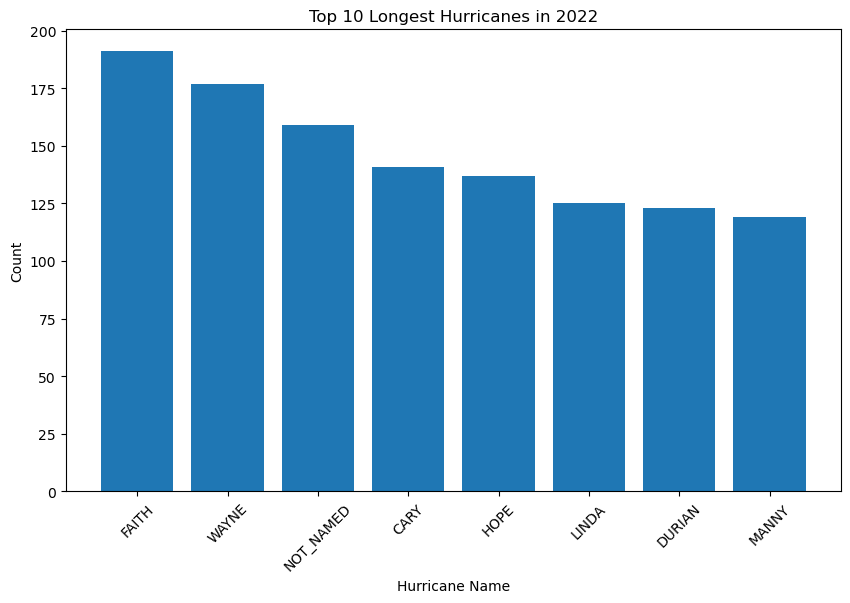

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Find the top 10 longest hurricanes in 2022
# ...

# Display the top 10 longest hurricanes of 2022
print(top_10_longest_hurricanes_names[['SID', 'NAME', 'Count']])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_longest_hurricanes_names['NAME'], top_10_longest_hurricanes_names['Count'])
plt.xlabel('Hurricane Name')
plt.ylabel('Count')
plt.title('Top 10 Longest Hurricanes in 2022')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [10]:
#Cut the data into decades
nine_twenty_decade = ni_data_df[(ni_data_df['ISO_TIME'].dt.year >= 1922) & (ni_data_df['ISO_TIME'].dt.year <= 1932)]
nine_twenty_decade



,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR,Decade
15347,1921361N05086,1921,73,NI,AS,NOT_NAMED,1922-01-01 00:00:00,TS,7.89397,67.7634,...,,,,,,,,23,295,1920
15348,1921361N05086,1921,73,NI,AS,NOT_NAMED,1922-01-01 03:00:00,NR,8.3,66.9,...,,,,,,,,19,295,1920
15349,1922108N09068,1922,26,NI,AS,NOT_NAMED,1922-04-18 00:00:00,TS,8.5,68.4,...,,,,,,,,1,100,1920
15350,1922108N09068,1922,26,NI,AS,NOT_NAMED,1922-04-18 03:00:00,TS,8.49334,68.435,...,,,,,,,,1,85,1920
15351,1922108N09068,1922,26,NI,AS,NOT_NAMED,1922-04-18 06:00:00,TS,8.5075,68.4756,...,,,,,,,,1,57,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20727,1932327N08089,1932,75,NI,BB,NOT_NAMED,1932-11-24 15:00:00,TS,9.06109,83.0475,...,,,,,,,,20,304,1930
20728,1932327N08089,1932,75,NI,BB,NOT_NAMED,1932-11-24 18:00:00,TS,9.71556,82.337,...,,,,,,,,20,320,1930
20729,1932327N08089,1932,75,NI,BB,NOT_NAMED,1932-11-24 21:00:00,TS,10.5842,81.7379,...,,,,,,,,21,329,1930
20730,1932327N08089,1932,75,NI,BB,NOT_NAMED,1932-11-25 00:00:00,TS,11.5273,81.2462,...,,,,,,,,18,333,1930
